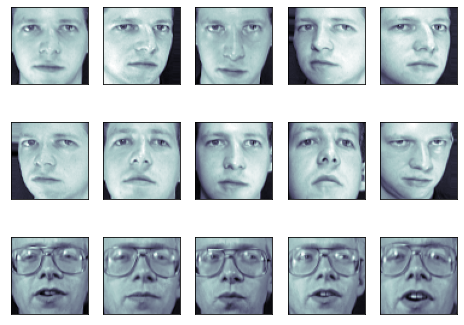

In [28]:
%matplotlib inline
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(faces.images[i], cmap=plt.cm.bone)


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
faces.target, random_state=98)
print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [30]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

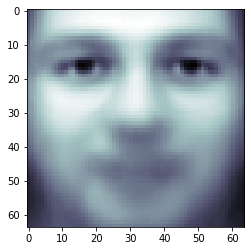

In [31]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),cmap=plt.cm.bone)

In [32]:
print(pca.components_.shape)

(150, 4096)


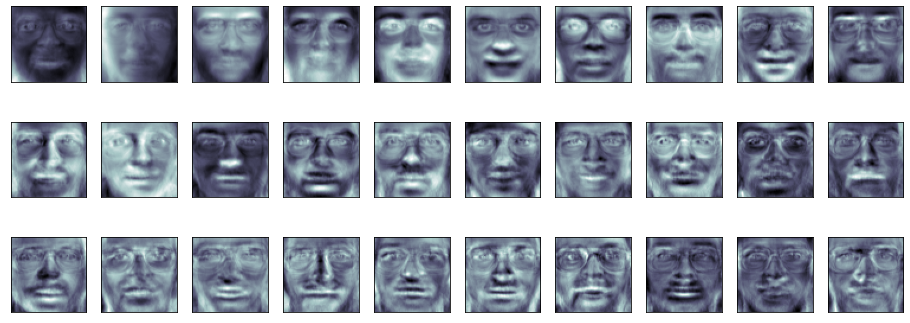

In [33]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
  ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(pca.components_[i].reshape(faces.images[0].shape),

    cmap=plt.cm.bone)

In [34]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 150)


In [35]:
print(X_test_pca.shape)

(100, 150)


In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

GaussianNB()

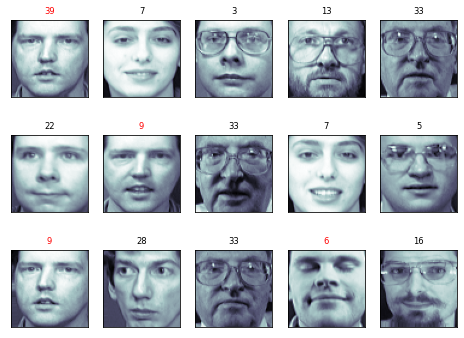

In [37]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(faces.images[0].shape),

    cmap=plt.cm.bone)

  y_pred = gnb.predict(X_test_pca[i, np.newaxis])[0]
  color = ('black' if y_pred == y_test[i] else 'red')
  ax.set_title(y_pred, fontsize='small', color=color)

In [38]:
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      1.00      0.40         2
           1       1.00      0.25      0.40         4
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           5       1.00      0.83      0.91         6
           6       0.60      1.00      0.75         3
           7       1.00      0.75      0.86         4
           8       1.00      0.75      0.86         4
           9       0.25      1.00      0.40         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         4
          12       0.50      1.00      0.67         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       1.00      0.33      0.50         3
          16       1.00      1.00      1.00         4
          17       1.00      1.00      1.00         2
          19       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
print(metrics.confusion_matrix(y_test, y_pred))

[[2 0 0 ... 0 0 0]
 [2 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [40]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),('gnb', GaussianNB())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

[[2 2 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]


**1. Train the Naive Bayes model without PCA and compare the result with PCA + Naive
Bayes. Write down your observations.**

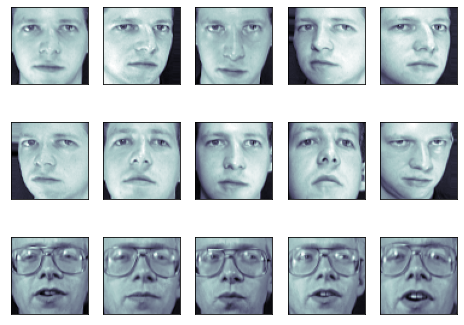

In [41]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [42]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(faces.data,
faces.target, random_state=98)
print(X_train1.shape, X_test1.shape)

(300, 4096) (100, 4096)


In [43]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train1, y_train1)

GaussianNB()

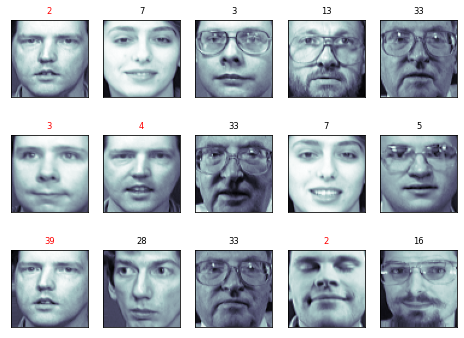

In [44]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test1[i].reshape(faces.images[0].shape),

    cmap=plt.cm.bone)

  y_pred1 = gnb.predict(X_test1[i, np.newaxis])[0]
  color = ('black' if y_pred1 == y_test[i] else 'red')
  ax.set_title(y_pred1, fontsize='small', color=color)

In [45]:
from sklearn import metrics
y_pred1 = gnb.predict(X_test1)
print(metrics.classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       1.00      0.25      0.40         4
           2       0.25      1.00      0.40         2
           3       0.33      0.50      0.40         2
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         3
           7       1.00      0.50      0.67         4
           8       1.00      1.00      1.00         4
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         2
          11       1.00      0.50      0.67         4
          12       0.50      1.00      0.67         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       0.50      0.67      0.57         3
          16       0.67      1.00      0.80         4
          17       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

2. Run PCA on IRIS dataset. Visualise the output in
2 dimensions using to Principal components. Choose different pairs of principal components and
note down your observations.
3. Run PCA + Naive Bayes classifier on IRIS dataset and calculate
precision and recall of the system. 

In [48]:
from sklearn.datasets import load_iris
dataset = load_iris()
print(dataset)
data=dataset.data
label=dataset.target

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [49]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(data,label, random_state=98)
print(X_train2.shape, X_test2.shape)

(112, 4) (38, 4)


In [51]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2, whiten=True)
pca.fit(X_train2)

PCA(n_components=2, whiten=True)

In [52]:
X_train_pca1 = pca.transform(X_train2)
X_test_pca1 = pca.transform(X_test2)
print(X_train_pca1.shape)

(112, 2)


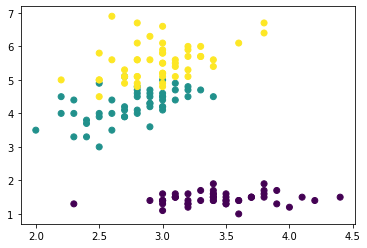

In [53]:
import matplotlib.pyplot as plt
plt.scatter(data[:,1], data[:,2], c=label)
plt.show()

In [54]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca1, y_train2)

GaussianNB()

In [57]:
from sklearn import metrics
y_pred2 = gnb.predict(X_test_pca1)
print(metrics.classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.65      0.79        17
           2       0.65      1.00      0.79        11

    accuracy                           0.84        38
   macro avg       0.88      0.88      0.86        38
weighted avg       0.90      0.84      0.84        38



**Components=1**

In [58]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1, whiten=True)
pca.fit(X_train2)

PCA(n_components=1, whiten=True)

In [59]:
X_train_pca1 = pca.transform(X_train2)
X_test_pca1 = pca.transform(X_test2)
print(X_train_pca1.shape)

(112, 1)


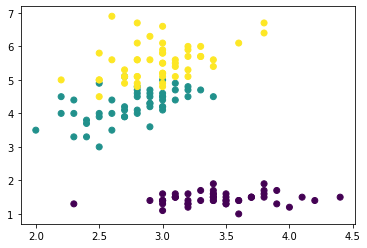

In [60]:
import matplotlib.pyplot as plt
plt.scatter(data[:,1], data[:,2], c=label)
plt.show()

In [61]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca1, y_train2)

GaussianNB()

In [62]:
from sklearn import metrics
y_pred2 = gnb.predict(X_test_pca1)
print(metrics.classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.76      0.87        17
           2       0.73      1.00      0.85        11

    accuracy                           0.89        38
   macro avg       0.91      0.92      0.90        38
weighted avg       0.92      0.89      0.90        38



**4. Replace Naive Bayes Classifier with Decision Tree Classifier
and then Support Vector Machine and compare performance of all three of them.**


In [77]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(data,label, random_state=98)
print(X_train2.shape, X_test2.shape)

(112, 4) (38, 4)


In [78]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2, whiten=True)
pca.fit(X_train2)

PCA(n_components=2, whiten=True)

In [80]:
X_train_pca2 = pca.transform(X_train2)
X_test_pca2 = pca.transform(X_test2)
print(X_train_pca1.shape)

(112, 2)


In [81]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=98)
dtc.fit(X_train_pca2, y_train2)

DecisionTreeClassifier(random_state=98)

In [82]:
from sklearn import metrics
y_pred3 = dtc.predict(X_test_pca1)
print(metrics.classification_report(y_test2, y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.82      0.90        17
           2       0.79      1.00      0.88        11

    accuracy                           0.92        38
   macro avg       0.93      0.94      0.93        38
weighted avg       0.94      0.92      0.92        38



In [83]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_pca1, y_train2)

SVC()

In [84]:
from sklearn import metrics
y_pred4 = clf.predict(X_test_pca1)
print(metrics.classification_report(y_test2, y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.88      0.94        17
           2       0.85      1.00      0.92        11

    accuracy                           0.95        38
   macro avg       0.95      0.96      0.95        38
weighted avg       0.96      0.95      0.95        38

